In [85]:
library(igraph)

In [100]:
#Question 18
egoNodes<-list.files("C:/Users/kprat/graphs/Project2/google/gplus/",pattern="*.circles")
fname <-c()
count<-0
pn<-c()
flag<-1
for (i in 1:length(egoNodes))
   {
   
 fname[[i]] <- strsplit(egoNodes[i],".circles")
 circles_file <- paste("C:/Users/kprat/graphs/Project2/google/gplus/",fname[[i]], ".circles", sep="")
 file_connection <- file(circles_file)#, open="r")
 circles <- readLines(file_connection)

 close(file_connection)

   if(length(circles) > 2)
       {
       count=count+1
            
       }
}
print(count)

[1] 57


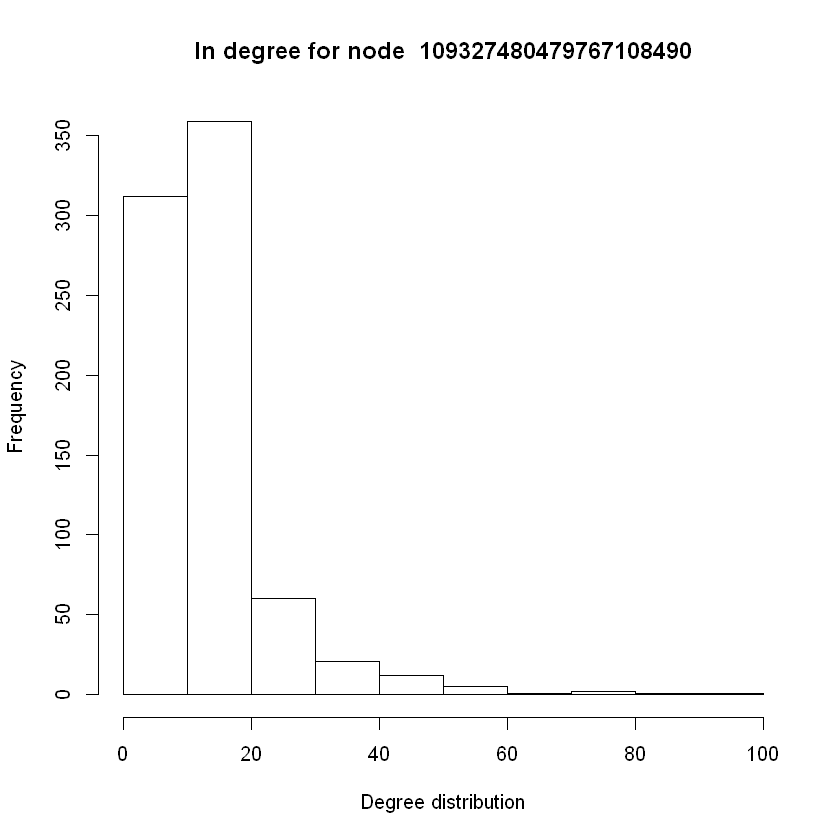

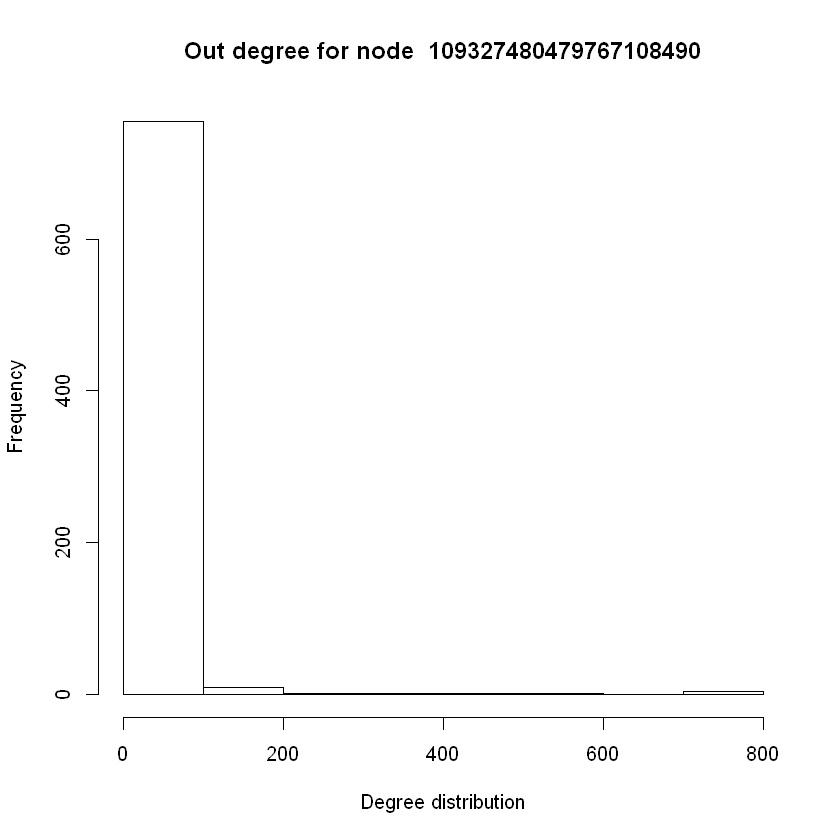

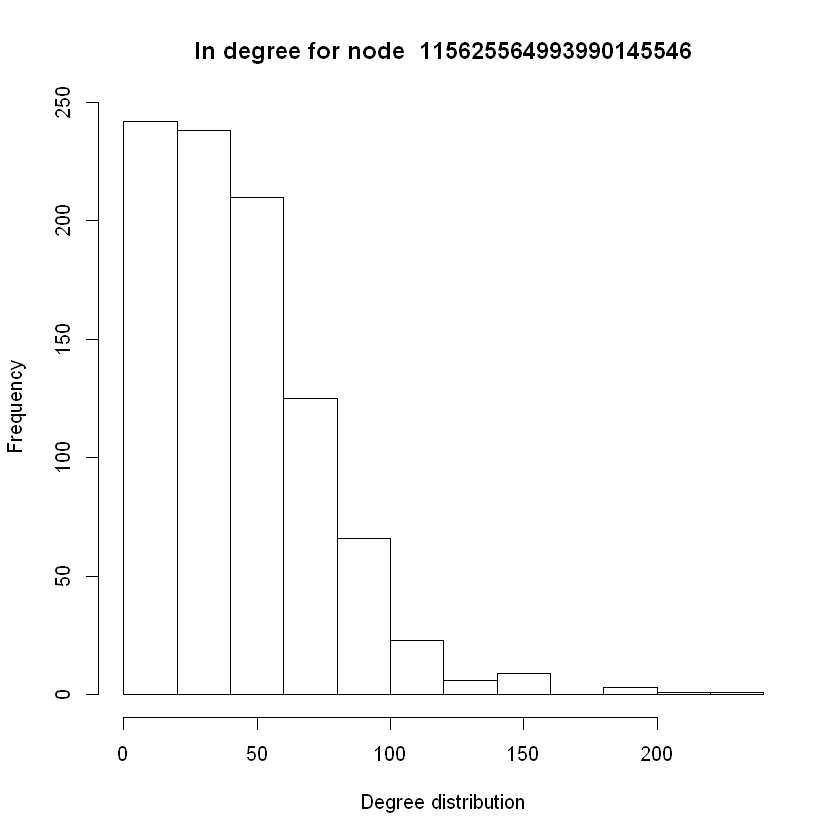

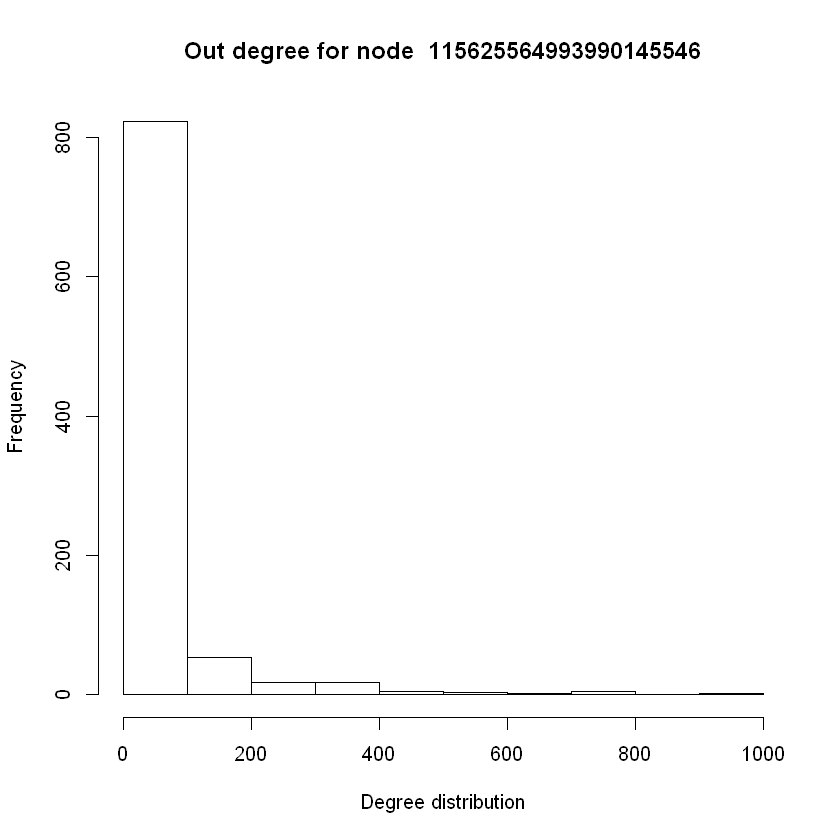

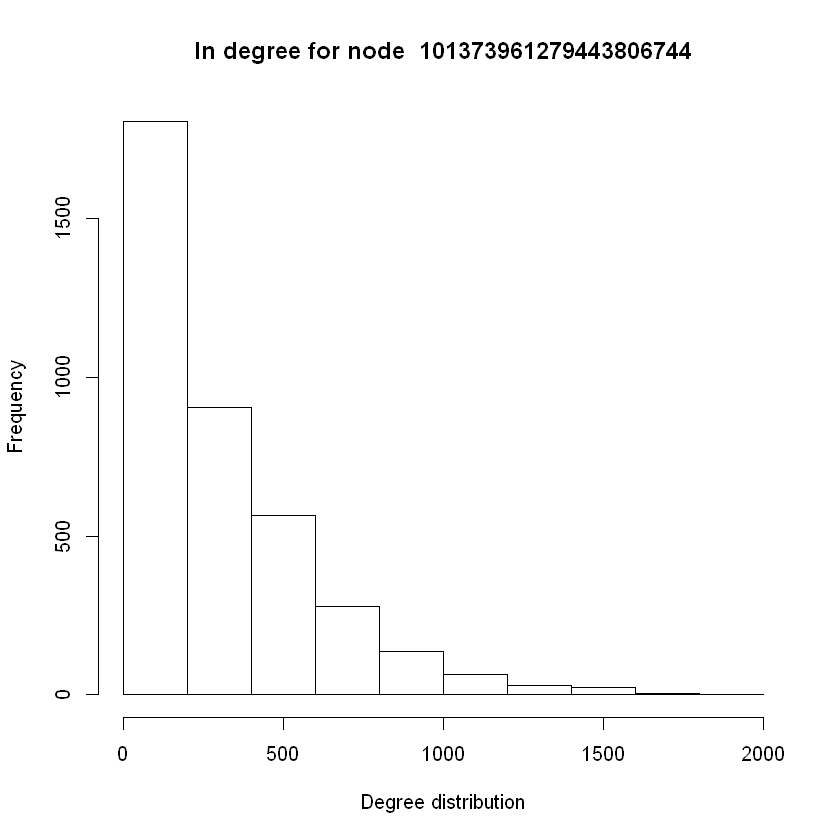

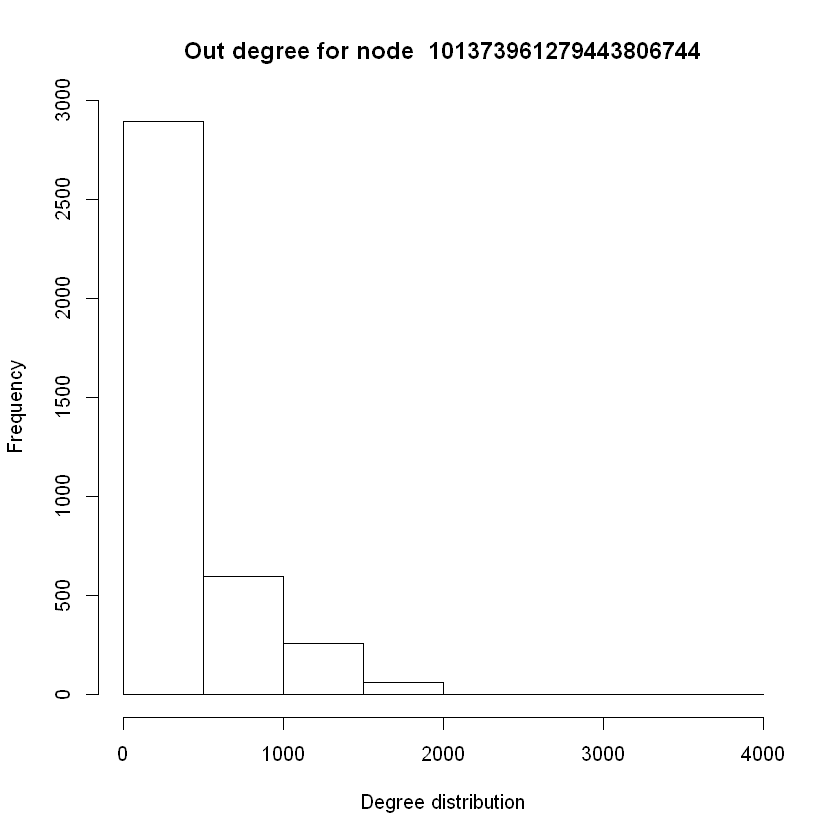

In [98]:
#Question 19
fname =c("109327480479767108490","115625564993990145546","101373961279443806744")
for (i in 1:3){
    
    edges_file <- paste("C:/Users/kprat/graphs/Project2/google/gplus/",fname[[i]], ".edges", sep="")
    g1<-read_graph(edges_file,format="ncol",directed=TRUE)
    g1 = add.vertices(g1, nv = 1, name = fname[[i]])
    index = which(V(g1)$name==fname[[i]]) 
  
    el = c()
    for (vertex in 1:(vcount(g1) - 1)) {
        el = c(el, c(index, vertex))
    }
  
    g1 = add_edges(g1, el)
    tit1 <- paste("In degree for node ",fname[[i]])
    tit2 <- paste("Out degree for node ",fname[[i]])
    hist(degree(g1,mode="in"),main= tit1,xlab="Degree distribution")
    hist(degree(g1,mode="out"),main= tit2,xlab="Degree distribution")

}

[1] "Modularity for node 109327480479767108490  is  0.252765387296677"
[1] "Modularity for node 115625564993990145546  is  0.319472551345825"


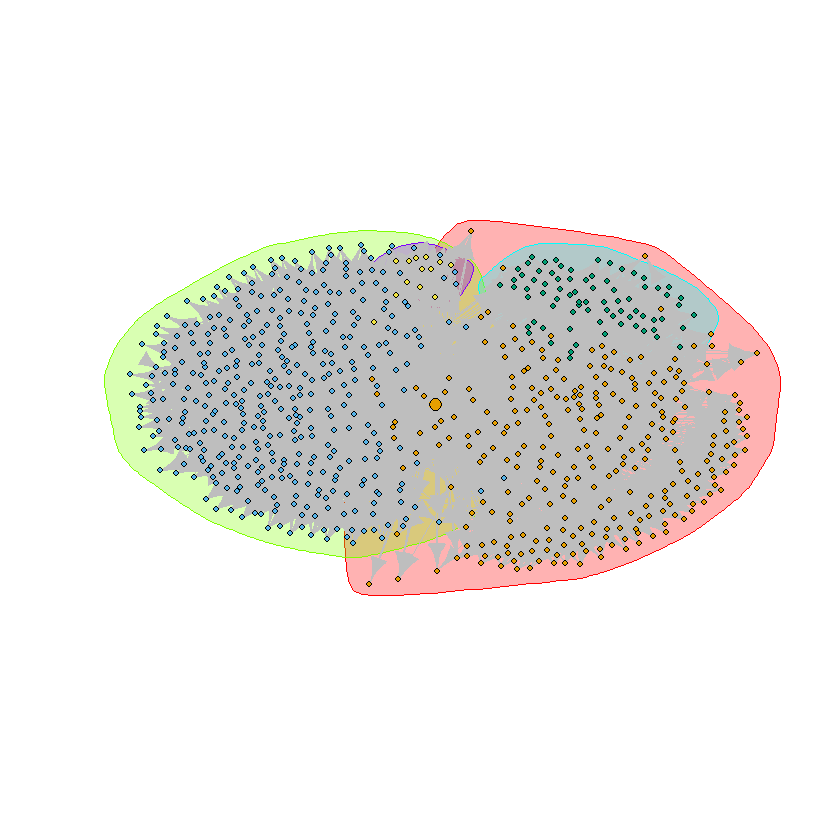

[1] "Modularity for node 101373961279443806744  is  0.191090270876884"


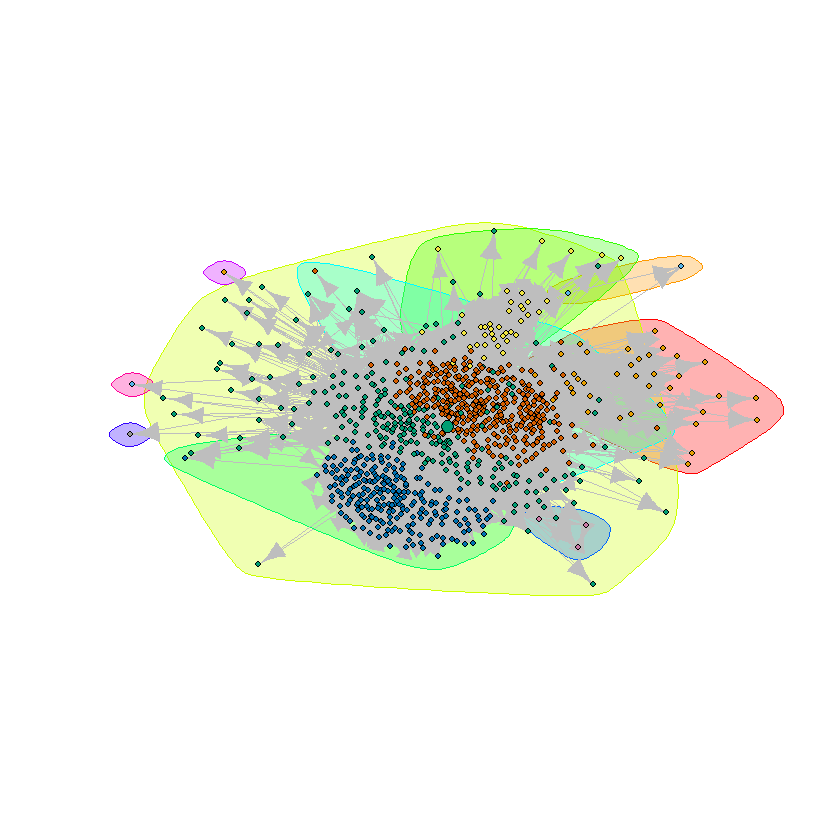

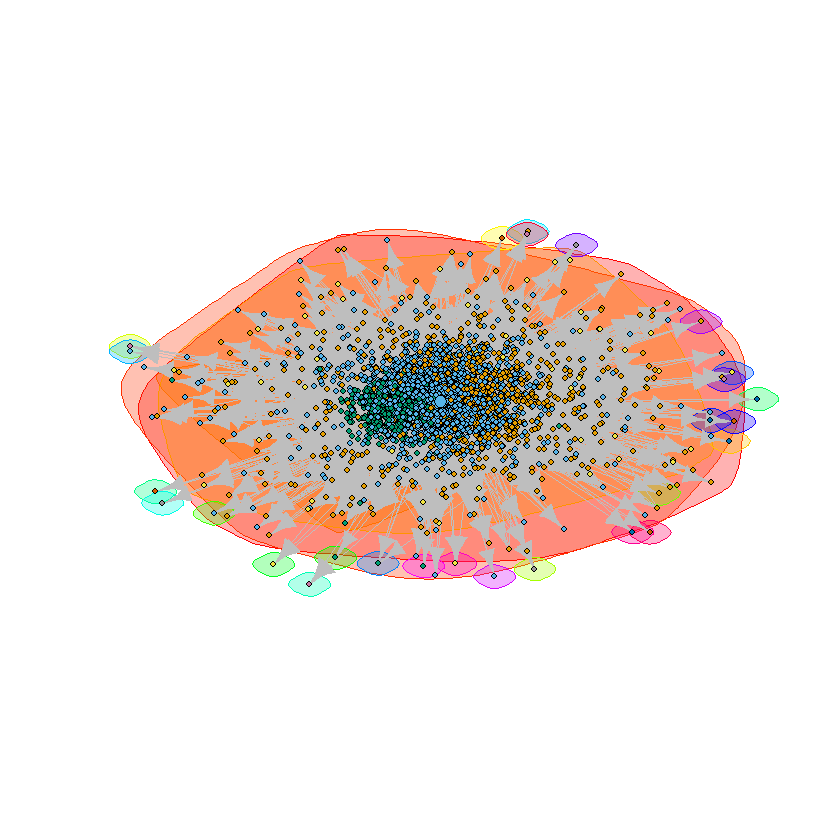

In [103]:
#Question 20
fname =c("109327480479767108490","115625564993990145546","101373961279443806744")
for (i in 1:3){
    
    edges_file <- paste("C:/Users/kprat/graphs/Project2/google/gplus/",fname[[i]], ".edges", sep="")
    g1<-read_graph(edges_file,format="ncol",directed=TRUE)
    g1 = add.vertices(g1, nv = 1, name = fname[[i]])
    index = which(V(g1)$name==fname[[i]]) 
  
    el = c()
    for (vertex in 1:(vcount(g1) - 1)) {
        el = c(el, c(index, vertex))
    }
  
    g1 = add_edges(g1, el)
    
   fg <- walktrap.community(g1)
    mod <- modularity(fg)
    print(paste("Modularity for node", fname[[i]]," is ", mod))
    node_size = rep(2, vcount(g1))
    node_size[index] = 4
    plot(fg, g1, vertex.size = node_size , asp = 9/16, vertex.label=NA , edge.color = "grey", layout=layout.fruchterman.reingold)

}

In [102]:
#Question 22
fname =c("109327480479767108490","115625564993990145546","101373961279443806744")


for (i in 1:3){
    circles_file <- paste("C:/Users/kprat/graphs/Project2/google/gplus/",fname[[i]], ".circles", sep="")
 file_connection <- file(circles_file)#, open="r")
 circlefile <- readLines(file_connection)
    
    circles = list()
     close(file_connection)
  for (j in 1:length(circlefile)) {
    circle_nodes = strsplit(circlefile[j],"\t")
    circles = c(circles, list(circle_nodes[[1]][-1]))
  }
    all_circle<-c()
    for ( l in circles)
        all_circle<-c(all_circle,l)
    all_circle<-unique(all_circle)
    N<-length(all_circle)
    h_c <-0
    
    for (l in circles){
        y<-length(l)/N
        temp <- y* log10(y)
        h_c<-h_c+temp
        
    }
    h_c<-h_c*-1
        
        
    edges_file <- paste("C:/Users/kprat/graphs/Project2/google/gplus/",fname[[i]], ".edges", sep="")
    g1<-read_graph(edges_file,format="ncol",directed=TRUE)
    g1 = add.vertices(g1, nv = 1, name = fname[[i]])
    index = which(V(g1)$name==fname[[i]]) 
  
    el = c()
    for (vertex in 1:(vcount(g1) - 1)) {
        el = c(el, c(index, vertex))
    }
  
    g1 = add_edges(g1, el)
    
   fg <- walktrap.community(g1)
   
        #calculating h(c/k) and h(k/c)
    percentage = vector()
  percentage_circle = vector()
  hck<-0
  hkc<-0
  hk<-0
  # check percentage of match for walktrap community 
  for(m in 1:max(fg$membership)){
    
    community_nodes = V(g1)$name[which(fg$membership == m)]
    bi<-length(intersect(community_nodes,all_circle))
    if(bi!=0) {
    hk<- hk + ((bi/N) * log10(bi/N))
    for (n in 1:length(circles)) {
      
      common_nodes = intersect(community_nodes, circles[[n]])
        cij<-length(unique(common_nodes))
        ai<-length(circles[[n]])
        if(cij!=0)
        {hck<-hck+ (cij/N)*log10(cij/bi)
        hkc <- hkc + (cij/N)*log10(cij/ai)}
      #print(hck)
      #print(hkc)
    }
        }
  }
hck<-hck*-1
  hkc<-hkc*-1
  hk<-hk*-1
h<- 1-hck/h_c
c<- 1- hkc/hk
print(paste("Homogeneity for node ", fname[[i]]," is ",h))
print(paste("Completeness for node ", fname[[i]]," is ",c))
print("===============")
}
    

    
    


[1] "Homogeneity for node  109327480479767108490  is  0.851885115440867"
[1] "Completeness for node  109327480479767108490  is  0.329873913536689"
[1] "==============="
[1] "Homogeneity for node  115625564993990145546  is  0.451890303032235"
[1] "Completeness for node  115625564993990145546  is  -3.4239623491117"
[1] "==============="
[1] "Homogeneity for node  101373961279443806744  is  0.00386670698130498"
[1] "Completeness for node  101373961279443806744  is  -1.5042383879479"
[1] "==============="
